In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torchvision.datasets import MNIST

import os
import sys

device = 'cuda' if torch.cuda.is_available() else 'cpu'

c:\Users\margo\anaconda3\envs\env311\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] La procédure spécifiée est introuvable'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

# Chargement du dataset MNIST
mnist_data = MNIST(root='./data', train=True, download=True, transform=transform)

# Récupération des images et labels
images = mnist_data.data  # Tensor de shape (60000, 28, 28)
labels = mnist_data.targets  # Tensor de shape (60000,)

In [4]:
print("Max images : ", images.max())
print("Min images : ", images.min())


Max images :  tensor(255, dtype=torch.uint8)
Min images :  tensor(0, dtype=torch.uint8)


In [5]:
# Conversion des images en vecteurs 1D (28*28 = 784)
images_reshaped = transform(images.numpy()).view((images.shape[0],28,28)) # Conversion en numpy array pour faciliter la manipulation
labels_numpy = labels.numpy()

In [6]:
sys.path.append('../')
from comparaison_modeles_outils import (
    load_data,
    retourne_weights
)
from reseau_train import(
    architectures_modele,
    Reseau
)

data_modele = "MNIST"
architecture = "2x20"

n, K = architectures_modele(data_modele, architecture)
data = MNIST(root='./data', train=True, download=True, transform=transform)

file = f'MNIST/Res_MNIST_{architecture}_weights.pth'
W, b = retourne_weights(K, n, file)

res = Reseau(K, n, W, b)    

path sys :  ['c:\\Users\\margo\\OneDrive\\Documents\\TRAVAIL\\These\\Code\\Adversarial_examples_ReLUNN\\datasets', 'c:\\Users\\margo\\anaconda3\\envs\\env311\\python311.zip', 'c:\\Users\\margo\\anaconda3\\envs\\env311\\DLLs', 'c:\\Users\\margo\\anaconda3\\envs\\env311\\Lib', 'c:\\Users\\margo\\anaconda3\\envs\\env311', '', 'c:\\Users\\margo\\anaconda3\\envs\\env311\\Lib\\site-packages', 'c:\\Users\\margo\\anaconda3\\envs\\env311\\Lib\\site-packages\\win32', 'c:\\Users\\margo\\anaconda3\\envs\\env311\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\margo\\anaconda3\\envs\\env311\\Lib\\site-packages\\Pythonwin', '../', 'c:\\Users\\margo\\OneDrive\\Documents\\TRAVAIL\\These\\Code\\Adversarial_examples_ReLUNN\\Models_MOSEK', 'c:\\Users\\margo\\OneDrive\\Documents\\TRAVAIL\\These\\Code\\Adversarial_examples_ReLUNN\\Models_gurobi', 'c:\\Users\\margo\\OneDrive\\Documents\\TRAVAIL\\These\\Code\\Adversarial_examples_ReLUNN']
Using cpu device
path sys :  ['c:\\Users\\margo\\OneDrive\\Documents\\TRA

In [7]:
dataloader = DataLoader(mnist_data, batch_size = 60000)
for batch, l in dataloader:
    espace_latent = res(batch.to(device), verbose = False, return_last_hidden=True)
    label = l

Derniere couche retournée


c:\Users\margo\OneDrive\Documents\TRAVAIL\These\Code\Adversarial_examples_ReLUNN\datasets\..\reseau_train.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32).to(device)


In [8]:
from reseau_train import evaluate

evaluate(res,dataloader)

Accuracy: 98.62833333333333%


In [9]:
# Création du DataFrame
df_mnist = pd.DataFrame(images_reshaped.view(-1,784))
df_mnist['label'] = labels_numpy

label = df_mnist["label"]
label.value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [10]:
df_mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


Application de la PCA

In [21]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(espace_latent.view(-1,20))     #output.view(-1,784))

<Axes: >

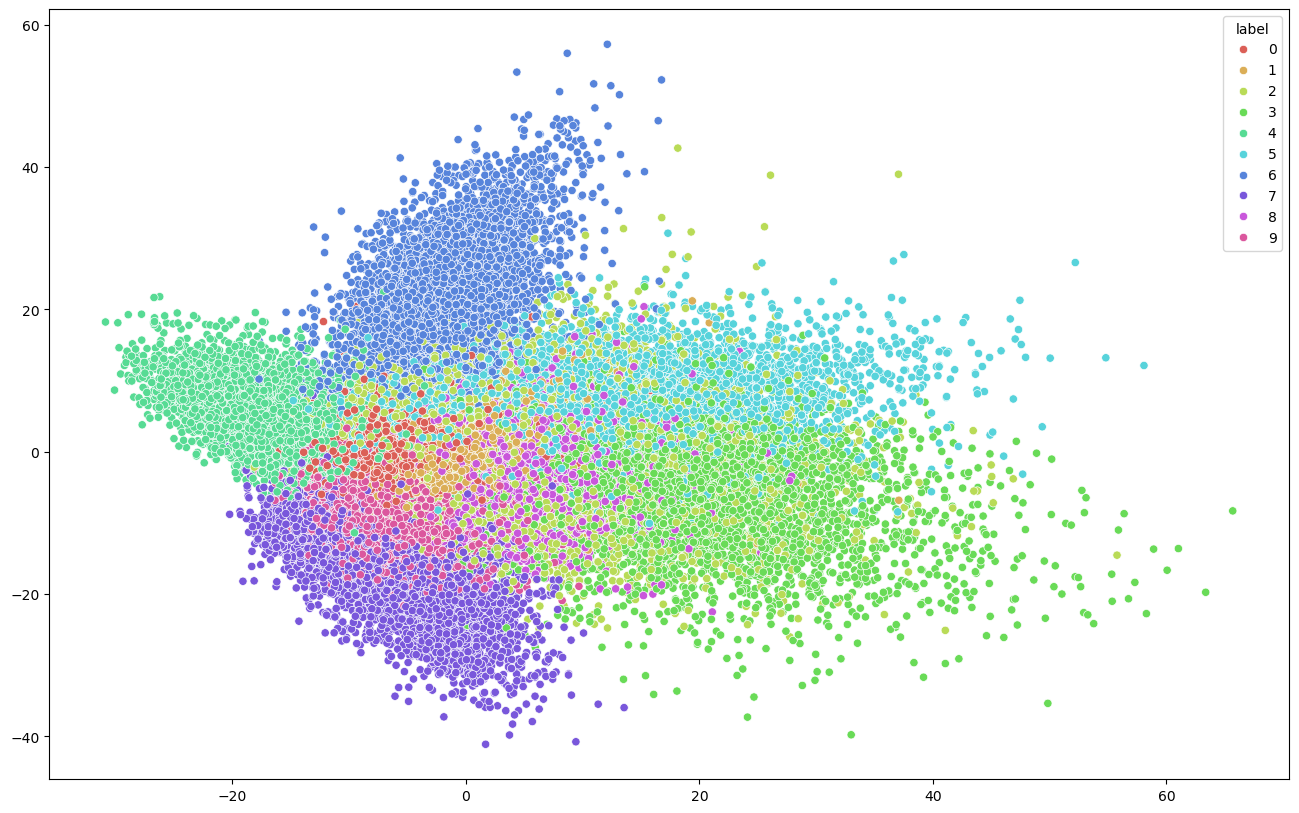

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full')

Application du t-SNE

In [13]:
espace_latent.shape

torch.Size([60000, 20])

In [23]:
tsne = TSNE(n_components=2, perplexity=30, n_iter = 300, verbose=2, init='pca')
tsne_res = tsne.fit_transform(espace_latent.view(-1,20))       #images_reshaped.view(-1,784))

df_mnist["Coordonnées_2D_0"] = tsne_res[:,0]
df_mnist["Coordonnées_2D_1"] = tsne_res[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.004s...


[t-SNE] Computed neighbors for 60000 samples in 5.294s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sample 13000 / 60000
[t-SNE] Computed conditional probabilities for sample 14000 / 60000

In [17]:
tsne_res[:,0].shape

(12000,)

<Axes: >

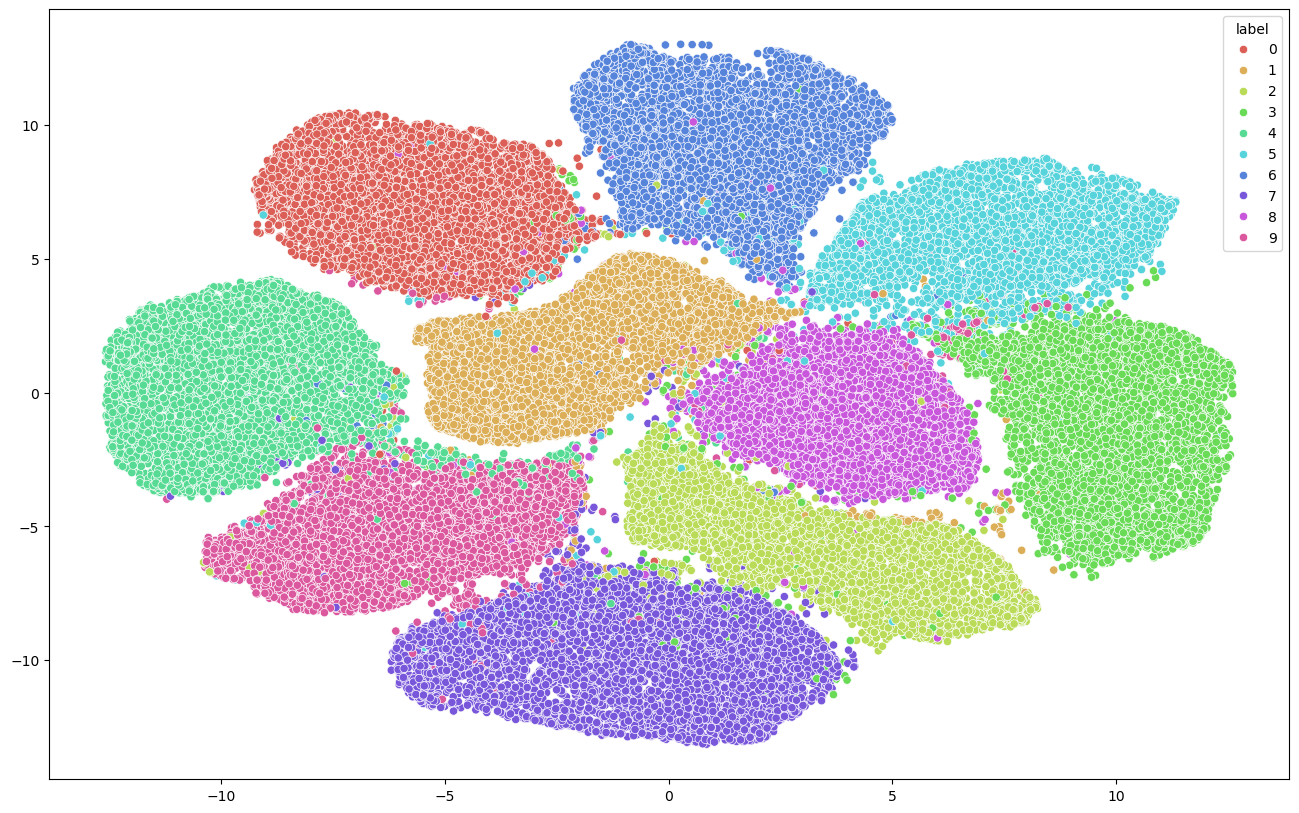

In [25]:
plt.figure(figsize=(16,10))

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full')

Recherche de paire de points voisins (distance inférieure à $\epsilon$=1)

In [27]:
from sklearn.neighbors import BallTree

points = df_mnist[["Coordonnées_2D_0","Coordonnées_2D_1"]]
# Création du BallTree avec les coordonnées des points
tree = BallTree(points, metric='euclidean')

# Recherche des paires de points dont la distance est inférieure à epsilon=1
epsilon = 1
indices = tree.query_radius(points, r=epsilon, return_distance=False)  
            # Liste : A chaque élement d'indice i correspond tout l'array des voisins de l'image numero i

Création de liste pour chaque donnée des labels des voisins

In [28]:
labels = df_mnist["label"].values

indices_labels = np.array([labels[sub_array] for sub_array in indices], dtype=object)
     # Liste : A chaque élement d'indice i correspond tout l'array des LABELS des voisins de l'image numero i
indices_prop = ([np.mean(indices_labels[i] == labels[i]) if len(indices_labels[i]) > 0 else 0 for i in range(len(indices_labels)) ])
indices_prop = np.array(indices_prop)
    # Liste : A chaque élement d'indice i correspond tout la proportion des voisins de l'image i qui ont le meme label que i

Sélection des points critiques : points ayant moins de **seuil** voisins ayant la même classe.

In [29]:
# Selection des points critiques
seuil = 0.5
points_critiques = np.where(indices_prop < seuil)[0]
print("Nombre de points critiques : ", points_critiques.shape)
df_mnist["Critique"] = df_mnist.index.isin(points_critiques)
df_mnist[df_mnist["Critique"]]["label"].value_counts()

Nombre de points critiques :  (1981,)


label
3    416
5    301
9    294
4    216
8    189
1    151
2    151
7    135
6     90
0     38
Name: count, dtype: int64

In [30]:
df_critique = df_mnist[df_mnist["Critique"]]
df_critique.head()

,0,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,label,Coordonnées_2D_0,Coordonnées_2D_1,Critique
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,7.581122,0.890100,True
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,-2.258464,-3.542053,True
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,5.461262,-4.746676,True
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,3.997555,2.248269,True
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-1.556216,-9.021106,True


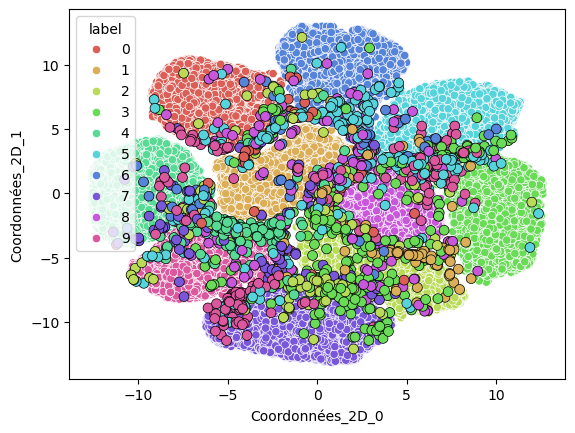

In [31]:
#Visualisation du résultat
# Créer une figure et un axe
fig, ax = plt.subplots()

# Premier scatterplot avec les points colorés en fonction de 'label'
sns.scatterplot(
    x=tsne_res[:, 0], 
    y=tsne_res[:, 1], 
    hue=label, 
    palette=sns.hls_palette(10), 
    legend='full', 
    ax=ax
)

# Deuxième scatterplot avec les points critiques entourés de noir
sns.scatterplot(
    x=df_mnist.iloc[points_critiques]["Coordonnées_2D_0"], 
    y=df_mnist.iloc[points_critiques]["Coordonnées_2D_1"], 
    hue=df_mnist.iloc[points_critiques]["label"], 
    palette=sns.hls_palette(10), 
    legend=False,  # Désactive la légende supplémentaire
    ax=ax,
    edgecolor='black',  # Contour noir
    linewidth=0.5,  # Épaisseur du contour
    s=50  # Taille des points pour mieux voir les contours (ajuster si besoin)
)

# Afficher le plot
plt.show()

Création d'un dataset à partir de ces points critiques

In [22]:

y = df_critique["label"].to_numpy()
X = df_critique[[i for i in range(784)]].to_numpy().reshape((y.shape[0],1,28,28))

In [23]:
split = 0.5

X, y = torch.from_numpy(X), torch.from_numpy(y)
#X, y = transforms.Normalize((0.5,), (0.5,))(torch.from_numpy(X).to(torch.float64)), torch.from_numpy(y)


In [28]:
dataset = TensorDataset(X, y)  # create the datset
train_size = int(split * len(dataset))
test_size = len(dataset) - train_size
dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [29]:
torch.save(dataset, f"MNIST/critical_points_dataset_seuil={seuil}.pt")

In [ ]:
X_tensor = torch.from_numpy(X).float()  # Maintenant la shape est (N, 1, 28, 28)

In [ ]:
X_tensor.max()

In [ ]:
# NORMALISATION ICI
# Transformation pour normaliser et convertir les images en tenseurs


In [ ]:
mean = X_tensor.mean(axis = 0)
std = X_tensor.std(axis = 0)

In [ ]:
mean

In [ ]:
std.min()

In [ ]:
std_safe = std+ 0.000001
X_transform = np.where(std[np.newaxis,:,:,:] <= 0.001, X_tensor - mean[np.newaxis,:,:,:], np.divide(X_tensor - mean[np.newaxis,:,:,:], std_safe[np.newaxis,:,:,:]))

In [ ]:
X_transform.shape[0] * X_transform.shape[2]  * X_transform.shape[3] 

In [ ]:
np.sum(X_transform > 4)

In [ ]:
#normalize = transforms.Normalize(mean=(0.5,), std=(0.5,))
type(X)

In [ ]:
X_transform.max()

In [ ]:
mask = np.sum((X_transform >= -2) & (X_transform <= 5), axis = (2,3))
mask_images = (mask == 784)
np.sum(mask_images)

In [ ]:
X_selected = X_tensor[mask_images.flatten()]
y_selected = y[mask_images.flatten()]

In [ ]:
y_selected.shape

In [ ]:
taille = 5

if X_selected.shape[0] < taille:
    raise ValueError("Pas assez de valeurs valides dans le tenseur.")


indices = np.random.choice(X_selected.shape[0], size=taille, replace=False)

X_transform_petit = X_selected[indices].reshape(taille, 1, 28, 28)
y_transform_petit = y_selected[indices]

In [ ]:
X_transform_petit.size

In [ ]:
dataset_transform = data.TensorDataset(torch.tensor(X_transform_petit), torch.tensor(y_transform_petit))  # create the datset
train_size = 0.8
test_size = 0.2
dataset_transform = torch.utils.data.random_split(dataset_transform, [train_size, test_size])

In [ ]:
torch.save(dataset_transform, f"MNIST/critical_points_dataset_seuil={seuil}_taille={taille}.pt")